In [83]:
import pandas as pd

data = pd.read_csv('../2_data cleaning/Cleaned_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.tail()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
10105,1,50,0,2,0,40,3,2,3,4003.0,...,0,1,0,0,0,0,1,0,0,0
10106,0,41,0,2,3,25,4,2,3,4277.0,...,0,1,0,0,0,0,1,0,0,0
10107,0,44,1,1,1,36,5,3,4,5409.0,...,0,0,0,0,1,0,1,0,0,0
10108,0,30,0,2,2,36,4,3,3,5281.0,...,0,1,0,0,0,0,1,0,0,0
10109,0,43,1,2,1,25,6,2,4,10388.0,...,0,0,0,0,1,0,0,0,0,1


In [73]:
# data.columns

In [74]:
# data.dtypes

In [84]:
# Select target and features

# Select features
features = data.drop(['Attrition_Flag'], axis=1)

# Select target
target = data['Attrition_Flag']

target.tail()


10105    1
10106    0
10107    0
10108    0
10109    0
Name: Attrition_Flag, dtype: int64

In [76]:
# Label target

# Not needed because already defined during data cleaning
# from sklearn.preprocessing import StandardScaler


# from sklearn.preprocessing import LabelEncoder
# y = LabelEncoder().fit_transform(target)



In [85]:
# Split the Samples to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=38)
X_train.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
7592,39,0,3,1,29,4,3,4,2187.0,0,...,0,0,1,0,0,0,1,0,0,0
8729,46,1,3,1,35,6,5,1,2069.0,1101,...,0,0,0,0,1,0,1,0,0,0
6302,42,1,1,1,36,4,3,1,2190.0,1299,...,0,0,0,0,1,0,1,0,0,0
8782,47,0,3,1,38,1,3,2,31987.0,0,...,0,0,0,1,0,0,1,0,0,0
3176,47,0,3,1,35,5,1,2,17343.0,1280,...,0,0,1,0,0,0,1,0,0,0


In [86]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Build X_train df for data visualization
X_train_df = pd.DataFrame(X_train, columns=features.columns).add_suffix('_scaled')
X_train_df.head()

,Customer_Age_scaled,Gender_scaled,Dependent_count_scaled,Marital_Status_scaled,Months_on_book_scaled,Total_Relationship_Count_scaled,Months_Inactive_12_mon_scaled,Contacts_Count_12_mon_scaled,Credit_Limit_scaled,Total_Revolving_Bal_scaled,...,Income_Category_$120K +_scaled,Income_Category_$40K - $60K_scaled,Income_Category_$60K - $80K_scaled,Income_Category_$80K - $120K_scaled,Income_Category_Less than $40K_scaled,Income_Category_Unknown_scaled,Card_Category_Blue_scaled,Card_Category_Gold_scaled,Card_Category_Platinum_scaled,Card_Category_Silver_scaled
0,-0.908773,-1.060766,0.516581,0.195089,-0.867347,0.119449,0.657761,1.400109,-0.700714,-1.430948,...,-0.275722,-0.464736,2.485455,-0.420189,-0.739060,-0.349918,0.266715,-0.102795,-0.049071,-0.237874
1,-0.038575,0.942715,0.516581,0.195089,-0.118145,1.404163,2.642827,-1.318043,-0.713660,-0.073796,...,-0.275722,-0.464736,-0.402341,-0.420189,1.353071,-0.349918,0.266715,-0.102795,-0.049071,-0.237874
2,-0.535831,0.942715,-1.030211,0.195089,0.006722,0.119449,0.657761,-1.318043,-0.700385,0.170270,...,-0.275722,-0.464736,-0.402341,-0.420189,1.353071,-0.349918,0.266715,-0.102795,-0.049071,-0.237874
3,0.085739,-1.060766,0.516581,0.195089,0.256457,-1.807621,0.657761,-0.411992,2.568864,-1.430948,...,-0.275722,-0.464736,-0.402341,2.379883,-0.739060,-0.349918,0.266715,-0.102795,-0.049071,-0.237874
4,0.085739,-1.060766,0.516581,0.195089,-0.118145,0.761806,-1.327304,-0.411992,0.962163,0.146850,...,-0.275722,-0.464736,2.485455,-0.420189,-0.739060,-0.349918,0.266715,-0.102795,-0.049071,-0.237874


In [87]:
# Use a KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1,10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
# Train the model with the train data
grid_search = grid.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_ *100)
print(f"Best result for {grid_search.best_params_.get('n_neighbors')} neighbors\nwith an accuracy of {round(grid_search.best_score_*100, 2)} %")
# # Make a predition on the X_test datas
# pred = knn.predict(X_test)
# # Compare the prediction with the y_test
# accuracy = knn.score(X_test, y_test)
# print(f'Test accuracy:{accuracy}')


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best result for 8 neighbors
with an accuracy of 87.95 %


In [90]:
# Run the model with the best parameters
optimal_kn = grid_search.best_params_.get('n_neighbors')

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_kn)
knn_optimal.fit(X_train, y_train)
accuracy_test = round(knn_optimal.score(X_test, y_test),3)   # model predict on X_test, and compare pred to y_test
print(f'Test sample accuracy: {accuracy_test}')

Test sample accuracy: 0.877


In [91]:
# Evaluate your model
from sklearn.metrics import classification_report
# "Attrition_Flag": {"Existing Customer":1 , "Attrited Customer": 0}}
pred = knn_optimal.predict(X_test)
target_names = ['Existing Customer', 'Attrited Customer']
print(classification_report(y_test, pred, target_names=target_names))

                   precision    recall  f1-score   support

Existing Customer       0.75      0.38      0.50       498
Attrited Customer       0.89      0.97      0.93      2535

         accuracy                           0.88      3033
        macro avg       0.82      0.68      0.72      3033
     weighted avg       0.87      0.88      0.86      3033



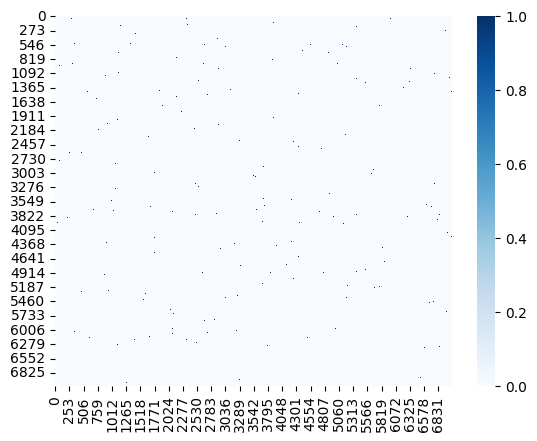

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the sparse matrix to a pandas DataFrame
graph_df = knn_optimal.kneighbors_graph().toarray()

# Plot the graph using heatmap function of seaborn
sns.heatmap(graph_df, cmap="Blues")
plt.show()
